In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(rc={'figure.figsize':(25,9)})
import plotly.graph_objects as go
from scipy import stats 
from datetime import date
from datetime import time
from datetime import datetime
import plotly
from sklearn import preprocessing


In [2]:
df=pd.read_csv('air_quality_Nov2017.csv')
df.head()

Station Air Quality  Longitude  Latitude O3 Hour  \
0        Barcelona - Sants        Good     2.1331   41.3788     NaN   
1     Barcelona - Eixample    Moderate     2.1538   41.3853      0h   
2       Barcelona - Gràcia        Good     2.1534   41.3987      0h   
3   Barcelona - Ciutadella        Good     2.1874   41.3864      0h   
4  Barcelona - Vall Hebron        Good     2.1480   41.4261      0h   

  O3 Quality  O3 Value NO2 Hour NO2 Quality  NO2 Value PM10 Hour PM10 Quality  \
0        NaN       NaN       0h        Good       84.0       NaN          NaN   
1       Good       1.0       0h    Moderate      113.0        0h         Good   
2       Good      10.0       0h        Good       73.0       NaN          NaN   
3       Good       2.0       0h        Good       86.0       NaN          NaN   
4       Good       7.0       0h        Good       69.0       NaN          NaN   

   PM10 Value        Generated   Date Time  
0         NaN  01/11/2018 0:00  1541027104  
1        36.0  01/11/2018 0:00  1541027104  
2         NaN  01/11/2018 0:00  1541027104  
3         NaN  01/11/2018 0:00  1541027104  
4         NaN  01/11/2018 0:00  1541027104

In [3]:
df.describe()

Longitude       Latitude     O3 Value    NO2 Value   PM10 Value  \
count  5744.00000    5744.000000  4101.000000  5460.000000  3647.000000   
mean      2.15240   13877.827714    34.082907    35.740293    16.590074   
std       0.02859   74410.803168    22.960687    22.357262     8.065424   
min       2.11510      41.378800     1.000000     1.000000     2.000000   
25%       2.13080      41.386400    14.000000    17.000000    10.000000   
50%       2.15070      41.398700    34.000000    33.000000    15.000000   
75%       2.16220      41.418300    52.000000    52.000000    22.000000   
max       2.20450  414261.000000   100.000000   117.000000    44.000000   

          Date Time  
count  5.744000e+03  
mean   1.542323e+09  
std    7.483961e+05  
min    1.541027e+09  
25%    1.541675e+09  
50%    1.542325e+09  
75%    1.542971e+09  
max    1.543616e+09

In [4]:
#Data Cleaning
df['Date Time']=pd.to_datetime(df['Date Time'], unit='s')
#df['Date Time']=pd.Series(pd.Series([datetime.strptime(i, '%d/%m/%Y %H:%M') for i in df['Generated']]) 
df['Generated'] =pd.Series([datetime.strptime(i, '%d/%m/%Y %H:%M') for i in df['Generated']]) 

In [5]:
df['Latitude']=pd.Series([i/10000 if i > 90 else i for i in df['Latitude']])

In [6]:
avg=df.groupby("Station").mean()  #Groups the data according to the station where it was measured and finds the mean of all the numeric columns
avg

Longitude  Latitude   O3 Value  NO2 Value  \
Station                                                               
Barcelona - Ciutadella       2.1874   41.3864  25.128388  39.855920   
Barcelona - Eixample         2.1538   41.3853  17.038760  56.240683   
Barcelona - Gràcia           2.1534   41.3987  26.675466  44.574534   
Barcelona - Observ Fabra     2.1239   41.4183  65.359084  11.449213   
Barcelona - Palau Reial      2.1151   41.3875  32.021398  27.974322   
Barcelona - Poblenou         2.2045   41.4039        NaN  41.161103   
Barcelona - Sants            2.1331   41.3788        NaN  36.359165   
Barcelona - Vall Hebron      2.1480   41.4261  36.367089  30.812940   

                          PM10 Value  
Station                               
Barcelona - Ciutadella           NaN  
Barcelona - Eixample       22.781337  
Barcelona - Gràcia         16.815166  
Barcelona - Observ Fabra   10.773449  
Barcelona - Palau Reial    14.527299  
Barcelona - Poblenou       20.540936  
Barcelona - Sants                NaN  
Barcelona - Vall Hebron    13.910078

In [7]:
#Replacing the missing values with the averages of the columns grouped by station 
#Each missing value is replaced with the average of that field for that particular station
for i in range(len(df)):
    if np.isnan(df['O3 Value'][i]):                             #isnan() in NumPy module returns True if the value is NaN
        df.at[i, 'O3 Value']=avg['O3 Value'][df['Station'][i]]
    if np.isnan(df['NO2 Value'][i]):
        df.at[i, 'NO2 Value']=avg['NO2 Value'][df['Station'][i]]
    if np.isnan(df['PM10 Value'][i]):
        df.at[i, 'PM10 Value']=avg['PM10 Value'][df['Station'][i]]

In [8]:
df.describe()

Longitude     Latitude     O3 Value    NO2 Value   PM10 Value
count  5744.00000  5744.000000  4308.000000  5744.000000  4308.000000
mean      2.15240    41.398125    33.765031    36.053485    16.558044
std       0.02859     0.015859    22.633559    21.995764     7.452222
min       2.11510    41.378800     1.000000     1.000000     2.000000
25%       2.13080    41.386125    15.000000    17.000000    11.000000
50%       2.15070    41.393100    32.021398    34.000000    16.000000
75%       2.16220    41.407500    52.000000    52.000000    20.000000
max       2.20450    41.426100   100.000000   117.000000    44.000000

In [9]:
#Handling all the remaining NaN values
df['O3 Value']=df['O3 Value'].fillna(method='bfill')
df['NO2 Value']=df['NO2 Value'].fillna(method='bfill')
df['PM10 Value']=df['PM10 Value'].fillna(method='bfill')

In [10]:
df['O3 Hour']=df['O3 Hour'].fillna(method='bfill')
df['NO2 Hour']=df['NO2 Hour'].fillna(method='bfill')
df['PM10 Hour']=df['PM10 Hour'].fillna(method='bfill')

In [11]:
df["O3 Hour"] = pd.Series([int(str(i).strip('h')) for i in df['O3 Hour'] if i!='NaN'])
df["NO2 Hour"] = pd.Series([int(str(i).strip('h')) for i in df['NO2 Hour'] if i!='NaN'])
df["PM10 Hour"] = pd.Series([int(str(i).strip('h')) for i in df['PM10 Hour'] if i!='NaN'])

In [12]:
for i in ["Air Quality", "O3 Value", "NO2 Quality", "PM10 Quality"]:
    indexNames = df[df[i] == "--"].index
    df.drop(indexNames, inplace=True)

C:\Users\Ruchika\Anaconda3\envs\tf-gpu-cuda9\lib\site-packages\pandas\core\ops.py:1649: FutureWarning:

elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison



In [13]:
df.describe()

Longitude     Latitude      O3 Hour     O3 Value     NO2 Hour  \
count  5444.000000  5444.000000  5444.000000  5444.000000  5444.000000   
mean      2.152399    41.398377    10.985489    35.810213    11.000367   
std       0.028726     0.016011     6.888363    24.323800     6.887004   
min       2.115100    41.378800     0.000000     1.000000     0.000000   
25%       2.123900    41.386400     5.000000    14.750000     5.000000   
50%       2.148000    41.398700    11.000000    34.500000    11.000000   
75%       2.187400    41.418300    17.000000    56.000000    17.000000   
max       2.204500    41.426100    23.000000   100.000000    23.000000   

         NO2 Value    PM10 Hour   PM10 Value  
count  5444.000000  5444.000000  5444.000000  
mean     35.717070    11.280860    16.976669  
std      22.295531     6.884731     7.920727  
min       1.000000     0.000000     2.000000  
25%      17.000000     5.000000    11.000000  
50%      33.000000    11.000000    16.000000  
75%      52.000000    17.000000    21.000000  
max     117.000000    23.000000    44.000000

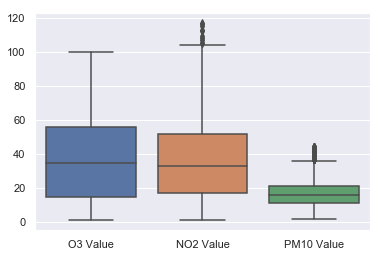

In [14]:
df = df.fillna("Moderate")
df_nums=df[['O3 Value', 'NO2 Value', 'PM10 Value']]
sns.boxplot(data=df_nums)

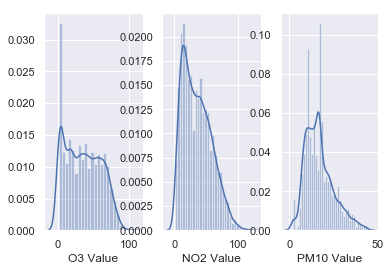

In [15]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(df['O3 Value'], ax=ax1)
sns.distplot(df['NO2 Value'], ax=ax2)
sns.distplot(df['PM10 Value'], ax=ax3)

Text(0.5, 0, 'PM10 Value')

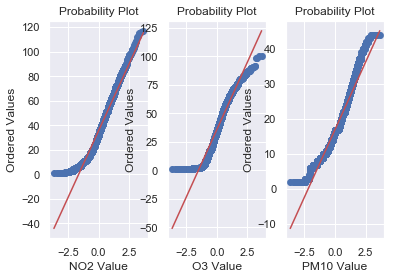

In [16]:
fig1, (ax1, ax2, ax3)=plt.subplots(1,3)
stats.probplot(df['NO2 Value'], plot=ax1)
stats.probplot(df['O3 Value'], plot=ax2)
stats.probplot(df['PM10 Value'], plot=ax3)
ax1.set_xlabel('NO2 Value')
ax2.set_xlabel('O3 Value')
ax3.set_xlabel('PM10 Value')

In [17]:
df_daywise=df.groupby([pd.Grouper(key='Generated',freq='D'), pd.Grouper(key='Station')]).mean()
df_daywise.describe()

Longitude    Latitude     O3 Hour    O3 Value    NO2 Hour   NO2 Value  \
count  239.000000  239.000000  239.000000  239.000000  239.000000  239.000000   
mean     2.152182   41.398101   10.967937   35.516127   10.982581   35.894825   
std      0.028507    0.015919    1.036092   20.593311    1.028721   16.093611   
min      2.115100   41.378800    5.000000    3.409091    5.000000    5.958333   
25%      2.128500   41.385850   10.541667   18.492438   10.541667   25.368056   
50%      2.148000   41.387500   11.285714   30.458333   11.375000   35.583333   
75%      2.153800   41.411100   11.500000   54.333333   11.500000   47.332298   
max      2.204500   41.426100   19.000000   76.458333   19.000000   76.666667   

        PM10 Hour  PM10 Value  
count  239.000000  239.000000  
mean    11.320845   16.985245  
std      1.144142    7.390430  
min      5.769231    2.625000  
25%     11.000000   11.690752  
50%     11.500000   16.000000  
75%     11.541667   21.001812  
max     22.333333   39.500000

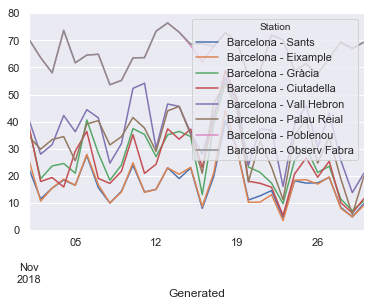

In [18]:
df_daywise['O3 Value'].unstack().plot()

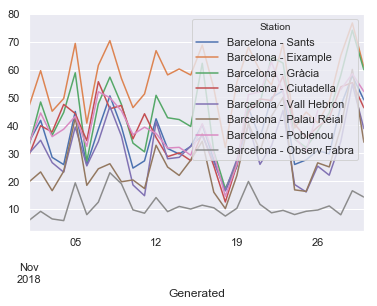

In [19]:
df_daywise['NO2 Value'].unstack().plot()

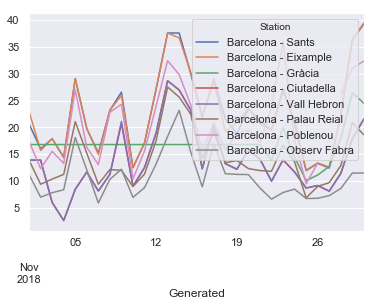

In [20]:
df_daywise['PM10 Value'].unstack().plot()

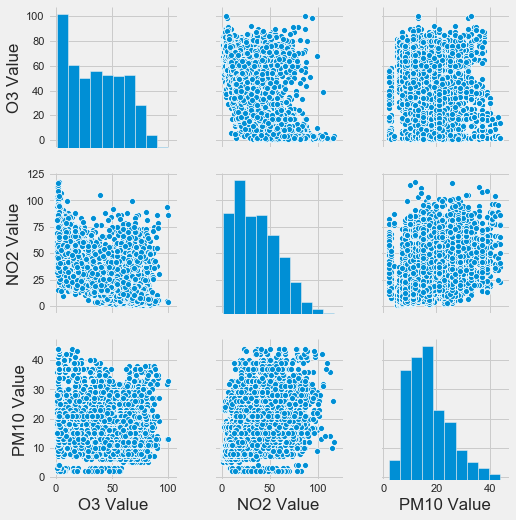

In [21]:
plt.style.use('fivethirtyeight')
g = sns.pairplot(df_nums)

In [22]:
df_more_nums = df[['O3 Value', 'NO2 Value', 'PM10 Value','Air Quality','O3 Quality', 'NO2 Quality', 'PM10 Quality']]

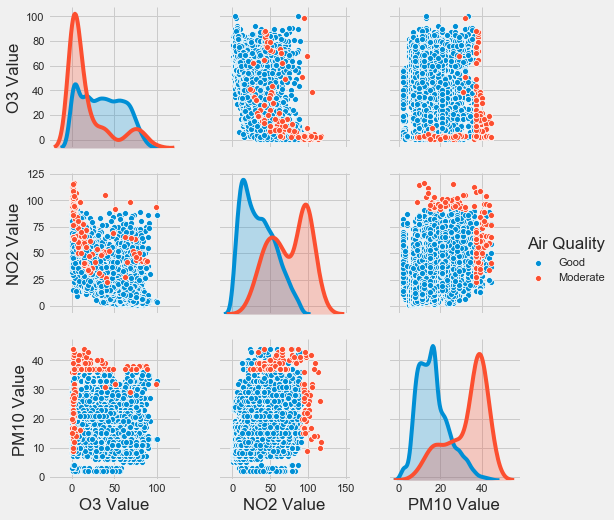

In [23]:
sns.pairplot(df_more_nums, hue="Air Quality")

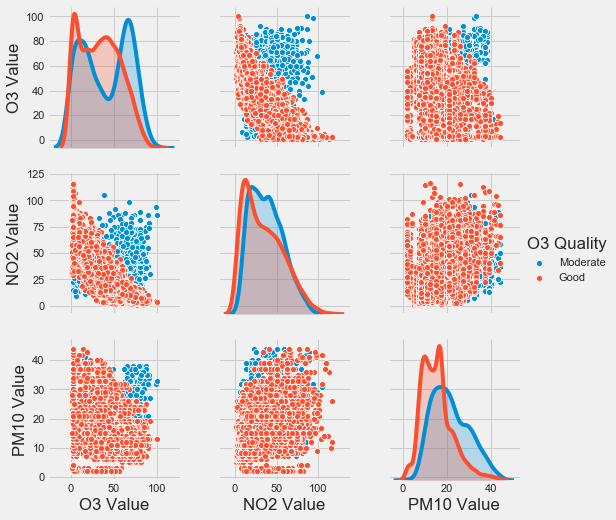

In [24]:
sns.pairplot(df_more_nums, hue="O3 Quality")

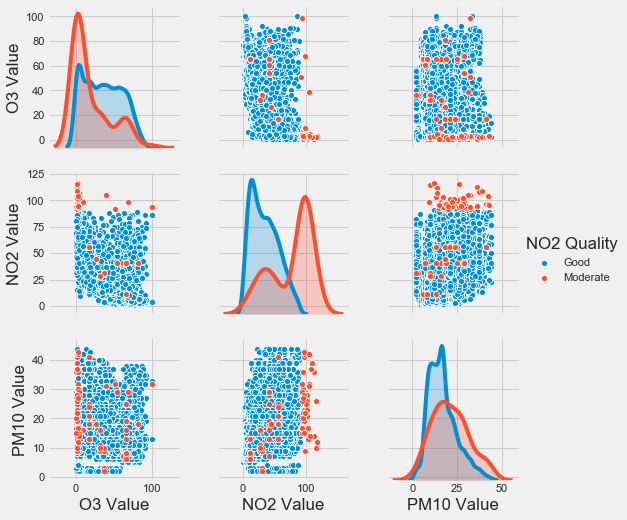

In [25]:
sns.pairplot(df_more_nums, hue="NO2 Quality")

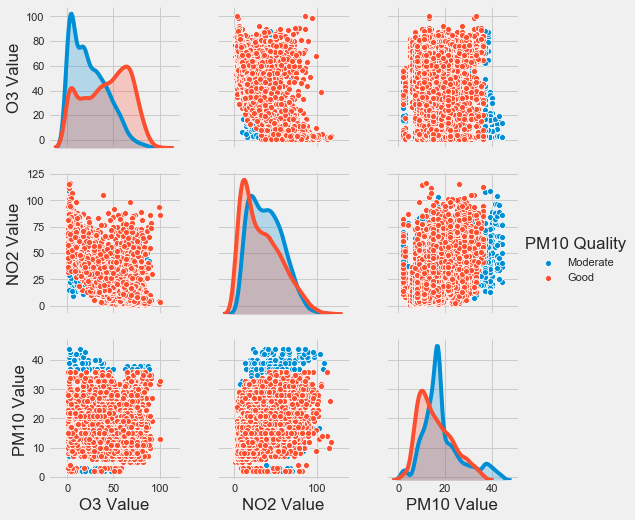

In [26]:
sns.pairplot(df_more_nums, hue="PM10 Quality")

In [27]:
data = [
    {
        'x': df["Longitude"],
        'y': df["Latitude"],
        'text': df["Station"],
        'mode': 'markers',
        'marker': {
            'color': df["PM10 Value"],
            'size': df["PM10 Value"],
            'showscale': True,
            'colorscale':'Viridis'
        }
    }
]

layout= go.Layout(title= 'Air Quality',
                  xaxis= dict(title= 'Longitude'),
                  yaxis=dict(title='Latitude'))

fig = go.Figure(data=data, layout=layout)
plotly.offline.iplot(fig)

In [28]:
#This normalization is for the whole dataset
O3_value_array = np.array(df["O3 Value"])
NO2_value_array = np.array(df["NO2 Value"])
PM10_value_array = np.array(df["PM10 Value"])
norm_O3_value = preprocessing.normalize([O3_value_array])
norm_NO2_value = preprocessing.normalize([NO2_value_array])
norm_PM10_value = preprocessing.normalize([PM10_value_array])

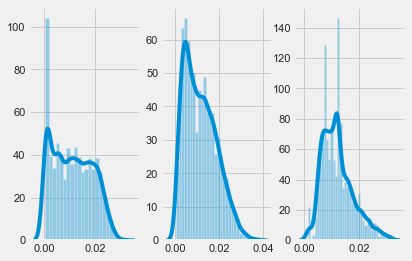

In [29]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(norm_O3_value, ax=ax1)
sns.distplot(norm_NO2_value, ax=ax2)
sns.distplot(norm_PM10_value, ax=ax3)

In [30]:
names = df_nums.columns
scaler = preprocessing.StandardScaler()
scaled_df_nums = scaler.fit_transform(df_nums)
scaled_df_nums = pd.DataFrame(scaled_df_nums, columns=names)
scaled_df_nums.head()

O3 Value  NO2 Value  PM10 Value
0 -1.431249   2.165787    2.401936
1 -1.431249   3.466615    2.401936
2 -1.061207   1.672369   -0.020392
3 -1.390133   2.255499   -0.387196
4 -1.184554   1.492944   -0.387196

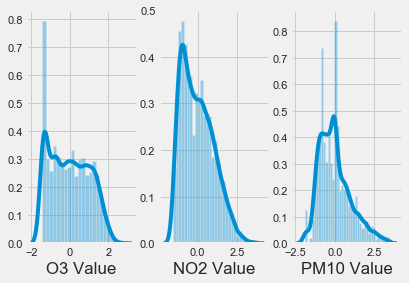

In [31]:
fig,(ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(scaled_df_nums["O3 Value"], ax=ax1)
sns.distplot(scaled_df_nums["NO2 Value"], ax=ax2)
sns.distplot(scaled_df_nums["PM10 Value"], ax=ax3)

In [32]:
# We are sampling the dataset for better visualizations and predictions
import csv
f = open("air_quality_Nov2017.csv")
new_f = open("sampled1.csv" , 'w')
reader = csv.reader(f)
writer = csv.writer(new_f)
lines = list(reader)
temp_list=[]
temp_list.append(lines[0])
for j in range(len(lines)):
    if j >= 2672 and j <=3824:
        temp_list.append(lines[j])
writer.writerows(temp_list)
f.close()
new_f.close()

In [33]:
# for some reason there were empty rows generated , removing them 
new_df = pd.read_csv("sampled1.csv")
new_df = new_df.dropna()
new_df.to_csv("sampled1.csv", index = False)

In [34]:
new_df.isna().sum()
#linear regression there are no na values ( o3 value and  no2 value)
x = new_df.iloc[ : , 6].values
y = new_df.iloc[ : , 9].values


In [35]:
#splitting the dataset
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 0)

In [36]:
'''
# Feature Scaling (Lets see if we should use it)
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
x_train = sc_X.fit_transform(x_train)
x_test = sc_X.transform(x_test)
sc_y = StandardScaler()
y_train = sc_y.fit_transform(y_train)
'''
x_train = x_train.reshape(-1,1)
#Fitting the linear regression model to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train , y_train) 

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [37]:
x_test = x_test.reshape(-1,1)
#predicting the test set results
y_pred=regressor.predict(x_test)

In [38]:
#How good is the best fit line
result=regressor.score(x_train,y_train)
print(result)

0.7647932208979782


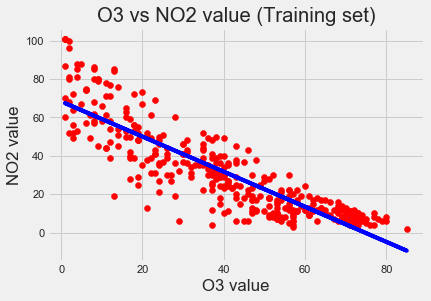

In [39]:
#visualising the training set results
plt.scatter(x_train,y_train,color='red')
plt.plot(x_train,regressor.predict(x_train),color='blue')
plt.title('O3 vs NO2 value (Training set)')
plt.xlabel('O3 value')
plt.ylabel('NO2 value')
plt.show() 

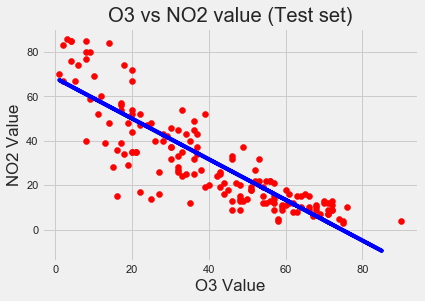

In [40]:
# Visualising the Test set results
plt.scatter(x_test, y_test, color = 'red')
plt.plot(x_train, regressor.predict(x_train), color = 'blue')
plt.title('O3 vs NO2 value (Test set)')
plt.xlabel('O3 Value')
plt.ylabel('NO2 Value')
plt.show()

In [41]:
#Some interesting visualizations on the sampled dataset
import plotly.graph_objects as go
from plotly.offline import plot
import pandas as pd
import numpy as np

In [42]:
df = pd.read_csv("sampled1.csv")
x = df.iloc[ : , 6]
y = df.iloc[ : , 9]
z = df.iloc[ : , 12]

In [43]:
plot_data = pd.DataFrame(x)
plot_data["NO2 Value"] = y
plot_data["PM10 Value"] = z

In [44]:
fig = go.Figure(data = [go.Surface(z=plot_data.values)])
fig.update_layout(title = "Realtion between O3 , NO2 and PM10 Values" , autosize = True, width = 500 , height = 500, margin=dict(l=65, r=50, b=65, t=90))
plot(fig)

'temp-plot.html'

In [45]:
#Station wise the distribution of the values of gases
l=df.Station.unique()
station1 = pd.DataFrame(df[df.Station == l[0]])
station2 = pd.DataFrame(df[df.Station == l[1]])
station3 = pd.DataFrame(df[df.Station == l[2]])
station4 = pd.DataFrame(df[df.Station == l[3]])


In [46]:
fig = go.Figure(data=[go.Scatter3d(
    x=station1["O3 Value"],
    y=station1["NO2 Value"],
    z=station1["PM10 Value"],
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)

'temp-plot.html'

In [47]:
    
fig = go.Figure(data=[go.Scatter3d(
    x=station2["O3 Value"],
    y=station2["NO2 Value"],
    z=station2["PM10 Value"],
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)
    

'temp-plot.html'

In [48]:
fig = go.Figure(data=[go.Scatter3d(
    x=station3["O3 Value"],
    y=station3["NO2 Value"],
    z=station3["PM10 Value"],
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)

'temp-plot.html'

In [49]:
    

fig = go.Figure(data=[go.Scatter3d(
    x=station4["O3 Value"],
    y=station4["NO2 Value"],
    z=station4["PM10 Value"],
    mode='markers',
    marker=dict(
        size=12,
        color=z,                # set color to an array/list of desired values
        colorscale='Viridis',   # choose a colorscale
        opacity=0.8
    )
)])

# tight layout
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)
    

'temp-plot.html'

In [50]:
#taking time into account
#variation of NO2 at all station with time 
df1 = pd.read_csv("sampled1.csv")
import plotly.express as px
fig = px.scatter_3d(df1 , x="Latitude" , y = "Longitude" , z = "Date Time" , color = "NO2 Value" )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)

'temp-plot.html'

In [51]:
#variation of NO2 at all station with time 
fig = px.scatter_3d(df1 , x="Latitude" , y = "Longitude" , z = "Date Time" , color = "PM10 Value" )
fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)

'temp-plot.html'

In [52]:
#variation of NO2 at all station with time 
fig = px.scatter_3d(df1 , x="Latitude" , y = "Longitude" , z = "Date Time" , color = "O3 Value" )

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
plot(fig)

'temp-plot.html'

In [53]:


#analysing the gases values wrt time for this sample
#in the figure we can select which plot to be visible at a time 
fig=go.Figure()
fig.add_trace(go.Scatter(x = df1["Date Time"] , y = df1["O3 Value"], mode = "lines+markers", name= "O3 lines"))
fig.add_trace(go.Scatter(x = df1["Date Time"] , y = df1["NO2 Value"], mode = "lines+markers", name= "NO2 lines"))
fig.add_trace(go.Scatter(x = df1["Date Time"] , y = df1["PM10 Value"], mode = "lines+markers", name= "PM10 lines"))
plot(fig)


'temp-plot.html'

In [54]:
#making a cool histogram for the same thing as the above graph
#as it is a histogram it is showing the probabilities also
import plotly.figure_factory as ff
hist_data = [df1["O3 Value"],df1["NO2 Value"],df1["PM10 Value"]]
group_labels = ["O3 Value","NO2 Value","PM10 Value"]

C:\Users\Ruchika\Anaconda3\envs\tf-gpu-cuda9\lib\site-packages\dask\config.py:168: YAMLLoadWarning:

calling yaml.load() without Loader=... is deprecated, as the default Loader is unsafe. Please read https://msg.pyyaml.org/load for full details.



In [55]:
# i will be taking a custom bin to make it look better
fig = ff.create_distplot(hist_data , group_labels , bin_size = .2)
plot(fig)

'temp-plot.html'

(array([21., 76., 99., 79., 69., 70., 45., 33., 25., 10.]),
 array([ 6. ,  8.7, 11.4, 14.1, 16.8, 19.5, 22.2, 24.9, 27.6, 30.3, 33. ]),
 <a list of 10 Patch objects>)

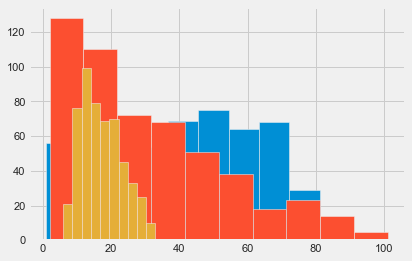

In [56]:
#normalising and standardising all the possible columns and plotting them 
#plotting the graphs before 
df_nums=df[['O3 Value', 'NO2 Value', 'PM10 Value']]
plt.hist(df["O3 Value"])
plt.hist(df["NO2 Value"])
plt.hist(df["PM10 Value"])


In [57]:
O3_value_array = np.array(df["O3 Value"])
NO2_value_array = np.array(df["NO2 Value"])
PM10_value_array = np.array(df["PM10 Value"])
norm_O3_value = preprocessing.normalize([O3_value_array])
norm_NO2_value = preprocessing.normalize([NO2_value_array])
norm_PM10_value = preprocessing.normalize([PM10_value_array])

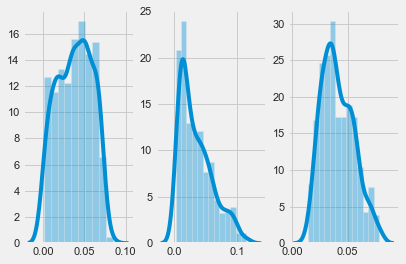

In [58]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(norm_O3_value, ax=ax1)
sns.distplot(norm_NO2_value, ax=ax2)
sns.distplot(norm_PM10_value, ax=ax3)

In [59]:
names = df_nums.columns
scaler = preprocessing.StandardScaler()
scaled_df_nums = scaler.fit_transform(df_nums)
scaled_df_nums = pd.DataFrame(scaled_df_nums, columns=names)
scaled_df_nums.head()


O3 Value  NO2 Value  PM10 Value
0  0.609876  -0.387091    0.616830
1 -0.713153   0.751089    2.621367
2 -0.986883   0.926193    1.452054
3 -0.576287   0.225775    1.285009
4  0.609876  -0.430867    0.616830

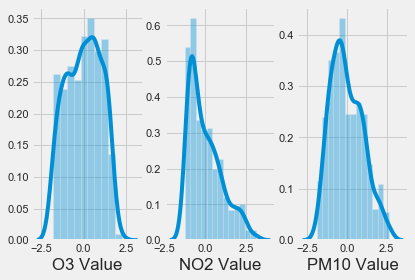

In [60]:
fig, (ax1, ax2, ax3)=plt.subplots(1,3)
sns.distplot(scaled_df_nums["O3 Value"], ax=ax1)
sns.distplot(scaled_df_nums["NO2 Value"], ax=ax2)
sns.distplot(scaled_df_nums["PM10 Value"], ax=ax3)

In [61]:
#Correlation
values = pd.DataFrame(df["O3 Value"])
values["NO2 Value"] = df["NO2 Value"]
values["PM10 Value"] = df["PM10 Value"]
values["Air Quality"] = df["Air Quality"]
#correlation matrix
values.corr()

O3 Value  NO2 Value  PM10 Value
O3 Value    1.000000  -0.867872   -0.417721
NO2 Value  -0.867872   1.000000    0.437596
PM10 Value -0.417721   0.437596    1.000000

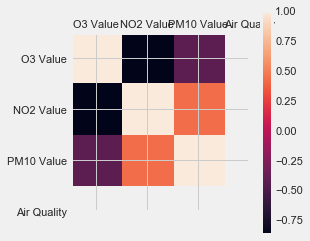

In [62]:
plt.matshow(values.corr())
plt.xticks(range(len(values.columns)),values.columns)
plt.yticks(range(len(values.columns)),values.columns)
plt.colorbar()
plt.show()

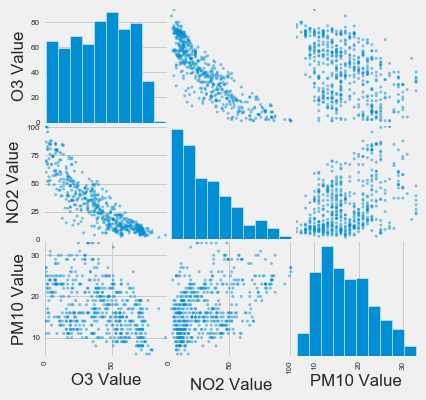

In [63]:
from pandas.plotting import scatter_matrix
scatter_matrix(values , figsize =(6,6))
plt.show()

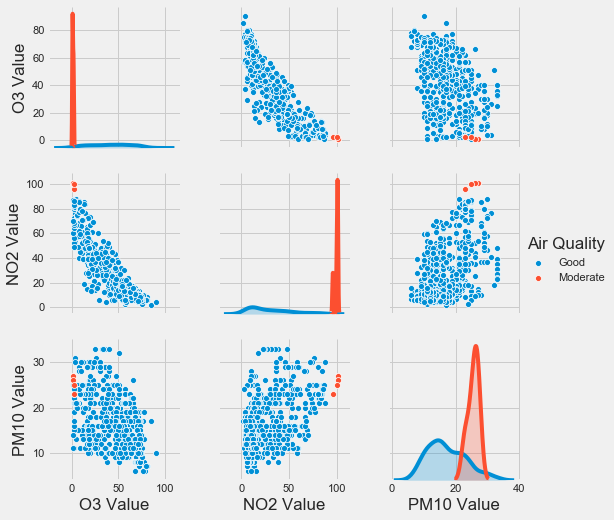

In [64]:
sns.pairplot(values, hue="Air Quality")

In [65]:
values.describe()

O3 Value   NO2 Value  PM10 Value
count  527.000000  527.000000  527.000000
mean    40.631879   30.842505   17.307400
std     21.940231   22.865200    5.992105
min      1.000000    2.000000    6.000000
25%     21.500000   12.000000   13.000000
50%     41.000000   25.000000   16.000000
75%     58.000000   45.000000   22.000000
max     90.000000  101.000000   33.000000

In [66]:
values['difference'] = values["O3 Value"] - values["PM10 Value"]

In [67]:
scaled_df_nums.describe()

O3 Value     NO2 Value    PM10 Value
count  5.270000e+02  5.270000e+02  5.270000e+02
mean  -2.696557e-17 -4.044835e-17 -1.617934e-16
std    1.000950e+00  1.000950e+00  1.000950e+00
min   -1.808073e+00 -1.262613e+00 -1.888843e+00
25%   -8.728284e-01 -8.248521e-01 -7.195289e-01
50%    1.679432e-02 -2.557623e-01 -2.183945e-01
75%    7.923628e-01  6.197605e-01  7.838744e-01
max    2.252256e+00  3.071224e+00  2.621367e+00

In [68]:
scaled_df_nums['O3 -PM10 diff'] = scaled_df_nums['O3 Value'] - scaled_df_nums['PM10 Value']

In [69]:
#Hypothesis Testing
#D’Agostino’s K^2 Test

#H0: O3 values <= PM10 values
#H1: O3 values > PM10 values

#Hypothesis: x doesn't come form a normal distibution -  is it true?


p_value = stats.normaltest(values["difference"]) #returns (test statistic, p-value)
print(p_value)
alpha = 0.05
if p_value[1] < alpha:
    print("Hypothesis can be rejected, H1 is true")
else:
    print("Hypothesis cannot be rejected, H0 is true")

NormaltestResult(statistic=108.15065410937679, pvalue=3.2763014424865598e-24)
Hypothesis can be rejected, H1 is true


In [70]:
import random
values_new = values.sample(n=75)
values_new.describe()

O3 Value  NO2 Value  PM10 Value  difference
count  75.000000  75.000000   75.000000   75.000000
mean   37.666667  33.146667   18.066667   19.600000
std    21.432694  22.784355    5.996245   24.720601
min     1.000000   3.000000    7.000000  -24.000000
25%    22.500000  15.000000   14.000000    1.500000
50%    39.000000  27.000000   18.000000   20.000000
75%    55.500000  46.500000   22.000000   40.000000
max    77.000000  87.000000   33.000000   65.000000

In [71]:
from scipy.stats import norm
ci  = 0.90
z = norm.ppf(ci)
std = values["difference"].std()
mean = values["difference"].mean()
print(std, mean)
CI = [mean-(z*std), mean+(z*std)]
print(z, ci, CI)

25.042227235747305 23.32447817836812
1.2815515655446004 0.9 [-8.768427340327467, 55.41738369706371]


In [74]:
p = norm.cdf((0-mean)/std)
p
#p < alpha, Null Hypothesis can be rejected, i.e. O3 Values > PM10 Values is true

0.1758218202246727

In [76]:
#Hypothesis Testing
#H0: O3 Values and PM10 values are not equal
#H1: O3 Values and PM10 Values are not equal

values_new['diffO3PM10'] = values_new["O3 Value"] - values_new["PM10 Value"]
from scipy.stats import norm
ci  = 0.90
z = norm.ppf(ci)
std = values_new['diffO3PM10'].std()
mean = values_new['diffO3PM10'].mean()
CI = [mean-(z*std), mean+(z*std)]

In [77]:
p = norm.cdf((0-mean)/std)
p
# p < alpha, Null Hypothesis can be rejected, i.e. O3 Values and PM10 Values are not equal is true

0.21392940986984654

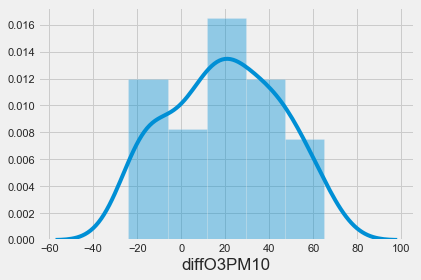

In [78]:
fig, (ax1)=plt.subplots(1)
sns.distplot(values_new['diffO3PM10'], ax=ax1)
